**Data Science Insight Into the History of Video Games**

CENG313 Team Heatran (23) Final Project
- Ayşe Orkan (181180055)
- Çiya Baran Öner (181180056)
- Mert Sağır (181180061)
- Mustafa Nesin (181180054)

In [71]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

DS1_NAME = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
DS2_NAME = 'vgsales-12-4-2019.csv'

df1 = pd.read_csv(DS1_NAME)
df2 = pd.read_csv(DS2_NAME)

## Heatmaps

<AxesSubplot:>

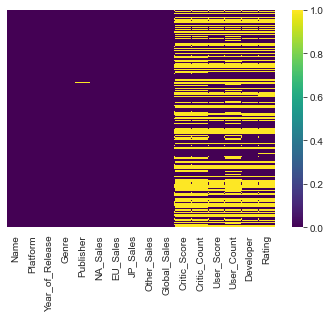

In [73]:
sns.heatmap(df1.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:>

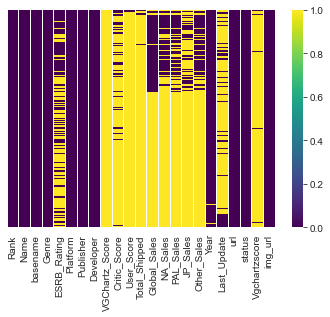

In [75]:
sns.heatmap(df2.isnull(), yticklabels=False, cmap='viridis')

In [77]:
df1.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [79]:
df1.shape

(16719, 16)

In [81]:
df1.dropna(inplace=True)
df1.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

## What will be score of the newly released game?

In [83]:
# Drop rows with invalid User Score
df1_q1 = df1[df1['User_Score'].notna() & (df1['User_Score'] != 'tbd') & df1['Critic_Score'].notna()]

# Convert User Score column to numeric type and scale to 100 by multiplying
df1_q1['User_Score'] = pd.to_numeric(df1_q1['User_Score']) * 10

<AxesSubplot:>

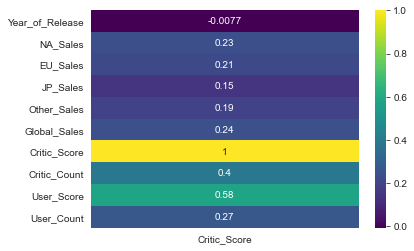

In [85]:
# Plot the correlation of Critic Score to other features
sns.heatmap(df1_q1.corr()[['Critic_Score']], annot=True, cmap="viridis")

<AxesSubplot:>

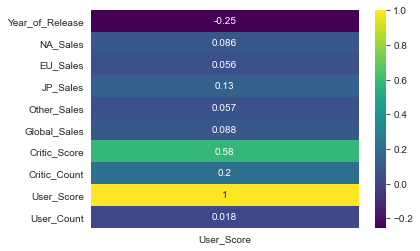

In [87]:
# Plot the correlation of User Score to other features
sns.heatmap(df1_q1.corr()[['User_Score']], annot=True, cmap="viridis")

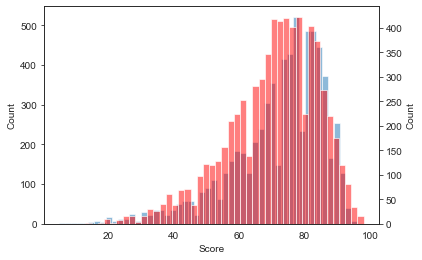

In [89]:
# Show User Score (blue) and Critic Score (red) in the same histogram plot
fig, ax = plt.subplots()
sns.histplot(df1_q1['User_Score'], label='User Score', alpha=.5, ax=ax)
ax2 = ax.twinx()
sns.histplot(df1_q1['Critic_Score'], label='Critic Score', color='Red', alpha=.5, ax=ax2)
ax.set_xlabel('Score')
plt.show()

In [91]:
# Drop rows with null values
df1_q1 = df1_q1[df1_q1['Developer'].notna()]
df1_q1 = df1_q1[df1_q1['Publisher'].notna()]

# Get instances with the number of critics greater than 15 for a more consistent result
df1_q1 = df1_q1[df1_q1['Critic_Count'] > 15]

In [93]:
def averages(colname):
  adf = df1_q1.groupby(colname, as_index=False)['Critic_Score'].mean()
  adf = adf.sort_values('Critic_Score', ascending=False)
  adf = adf.rename(columns={'Critic_Score': colname + '_Score'})
  return adf

# Calculate the average scores of the developers
averages('Developer')

,Developer,Developer_Score
218,DMA Design,97.000000
448,"Irrational Games, 2K Marin",96.000000
241,"Digital Extremes, 2K Marin",94.000000
142,Bungie Software,93.666667
219,"DMA Design, Rockstar North",93.000000
...,...,...
404,Hothouse Creations,30.000000
709,Red Tribe,29.000000
765,Santa Cruz Games,28.000000
23,AI,26.000000


In [95]:
# Calculate the average scores of the publishers
averages('Publisher')

,Publisher,Publisher_Score
173,Valve,95.0
174,Valve Software,93.0
1,2D Boy,90.0
146,SquareSoft,89.2
65,Havas Interactive,88.0
...,...,...
163,The Adventure Company,50.0
89,Mad Catz,49.0
121,Phantom EFX,44.0
161,Telltale Games,40.0


## What are the top selling games?

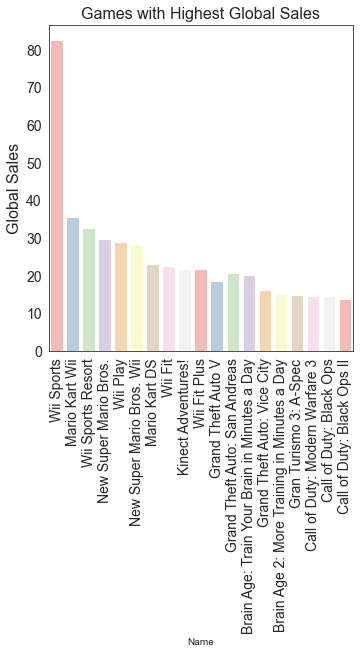

In [97]:
fig=plt.figure(figsize=(12,6))
sns.set_style("white")
plt.subplot(1, 2, 1)
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Games with Highest Global Sales',fontdict={'fontsize':16})
plt.xticks(rotation=90)
sns.barplot(x='Name', y='Global_Sales', data=df1[['Name','Global_Sales']].sort_values(by='Global_Sales',ascending=False).head(20),ci=None,palette='Pastel1');
plt.ylabel('Global Sales',fontdict={'fontsize':16});


## Which platforms have more games?


Text(0.5, 0, 'Number of Games')

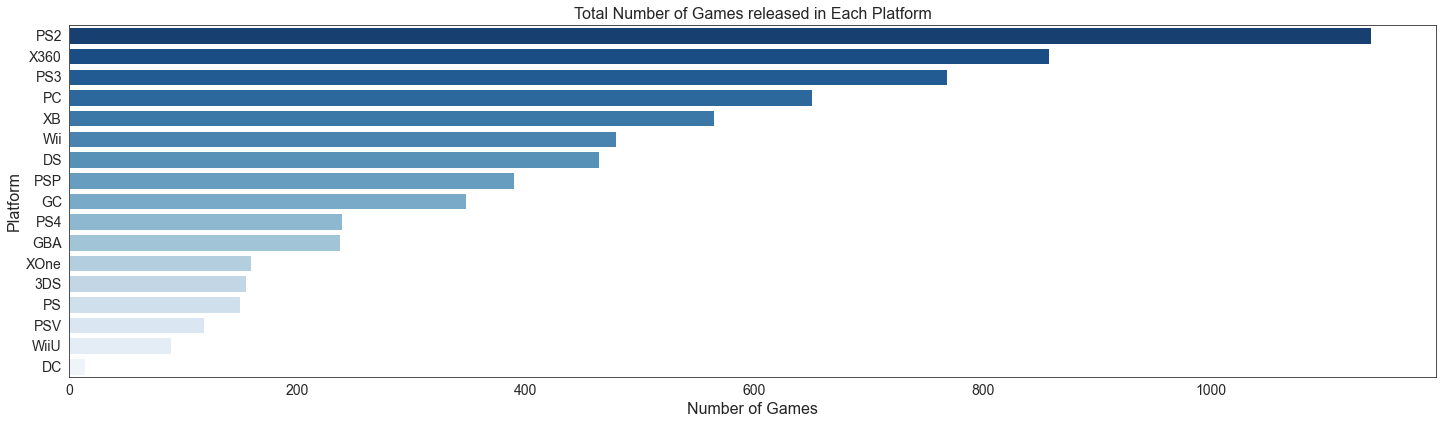

In [99]:
fig=plt.figure(figsize=(24.5,22))
sns.set_style("white")
plt.subplot2grid((3,1), (1,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Total Number of Games released in Each Platform',fontdict={'fontsize':16})
sns.barplot(y=df1['Platform'].value_counts().index,x=df1['Platform'].value_counts(),palette='Blues_r')
plt.ylabel('Platform',fontdict={'fontsize':16})
plt.xlabel('Number of Games',fontdict={'fontsize':16})

## Global sales for genres by years


In [101]:
df1.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [103]:
sales = df1.dropna(subset=['Year_of_Release'], how='all')
sales['Year_of_Release'] = sales['Year_of_Release'].astype(str)
sales = sales.sort_values(by=['Year_of_Release'])

genre = list(sales['Genre'].value_counts().index)
year = list(sales['Year_of_Release'].value_counts().sort_index().index)


d = {}
p = []
y = []


for i in genre:
  for j in year:
        p.append(i)
        y.append(j)

d['Genre'] = p
d['Year_of_Release'] = y

scratch = pd.DataFrame(d)
scratch['Global_Sales'] = 0


sales = sales.loc[:,['Genre', 'Year_of_Release', 'Global_Sales']]

final = pd.concat([sales,scratch])
final = final.sort_values(by=['Year_of_Release'])

finalx = pd.DataFrame(final.groupby(['Genre', 'Year_of_Release'])['Global_Sales'].sum())
finalx = finalx.reset_index()

fig = px.bar(
    data_frame=finalx,
    y='Global_Sales',
    x='Genre',
    animation_frame='Year_of_Release', template="plotly_white", color_discrete_sequence=['rgb(50, 147, 140)']).update_xaxes(categoryorder="total descending")

fig.show()

## What are North American sales relative to sales in other regions?

<AxesSubplot:>

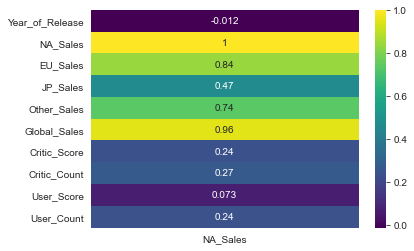

In [104]:
sns.heatmap(df1_q1.corr()[['NA_Sales']], annot=True, cmap="viridis")

In [105]:
dff=df1[['NA_Sales',	'EU_Sales'	,'JP_Sales'	,'Other_Sales']]
dff.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
6,11.28,9.14,6.50,2.88
7,13.96,9.18,2.93,2.84


In [106]:
y=np.array(dff['NA_Sales'])
X=np.array(dff.drop('NA_Sales', axis=1))

In [107]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [108]:
linear=LinearRegression()

In [109]:
linear.fit(X_train,y_train)

LinearRegression()

In [110]:
linear.score(X_test,y_test)

0.5971881879599581

In [111]:
linear.score(X_train,y_train)

0.7643240871839156

In [112]:
print('Coefficients: \n',linear.coef_)
print('Constant: \n',linear.intercept_)

Coefficients: 
 [0.89307772 0.11528343 1.0974233 ]
Constant: 
 0.09148739780312881


In [113]:
dff.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
6,11.28,9.14,6.50,2.88
7,13.96,9.18,2.93,2.84


In [114]:
new_data=np.array([[20,4,8]])
linear.predict(new_data)

array([27.19356193])

In [115]:
new_data2=np.array([[12.76,3.79,3.29]]) #We write the sales figures in row 2 of the data set to see if the regression model can make a correct prediction.
linear.predict(new_data2)

array([15.53460597])

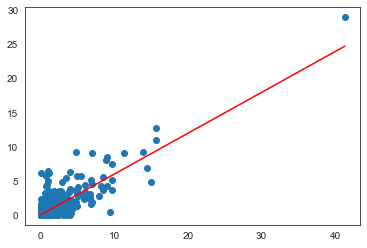

In [116]:
X = dff.iloc[:, 0].values.reshape(-1, 1)  
y = dff.iloc[:, 1].values.reshape(-1, 1) 
linear_regressor = LinearRegression()  
linear_regressor.fit(X, y)  
y_pred = linear_regressor.predict(X)  
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

## Which continent plays which game more?

In [117]:
# For North America
# Sort the sales values in descending order and show the first 10 game
df1.sort_values('NA_Sales', ascending=False)[['Name', 'NA_Sales']].head(10)

,Name,NA_Sales
0,Wii Sports,41.36
2,Mario Kart Wii,15.68
3,Wii Sports Resort,15.61
14,Kinect Adventures!,15.00
8,New Super Mario Bros. Wii,14.44
7,Wii Play,13.96
6,New Super Mario Bros.,11.28
11,Mario Kart DS,9.71
32,Call of Duty: Black Ops,9.70
23,Grand Theft Auto V,9.66


In [118]:
# For Europe
# Sort the sales values in descending order and show the first 10 game
df1.sort_values('EU_Sales', ascending=False)[['Name', 'EU_Sales']].head(10)

,Name,EU_Sales
0,Wii Sports,28.96
2,Mario Kart Wii,12.76
3,Wii Sports Resort,10.93
19,Brain Age: Train Your Brain in Minutes a Day,9.20
7,Wii Play,9.18
6,New Super Mario Bros.,9.14
16,Grand Theft Auto V,9.09
15,Wii Fit Plus,8.49
13,Wii Fit,8.03
11,Mario Kart DS,7.47


In [119]:
# For Japan
# Sort the sales values in descending order and show the first 10 game
df1.sort_values('JP_Sales', ascending=False)[['Name', 'JP_Sales']].head(10)

,Name,JP_Sales
6,New Super Mario Bros.,6.50
43,Animal Crossing: Wild World,5.33
26,Brain Age 2: More Training in Minutes a Day,5.32
8,New Super Mario Bros. Wii,4.70
73,Animal Crossing: New Leaf,4.39
152,Dragon Quest IX: Sentinels of the Starry Skies,4.35
19,Brain Age: Train Your Brain in Minutes a Day,4.16
163,Monster Hunter Freedom Unite,4.13
11,Mario Kart DS,4.13
2,Mario Kart Wii,3.79




```
# Bu, kod olarak biçimlendirilmiştir
```

## Which platform should be focused on for the new games from the publisher’s perspective?

In [120]:
df2_copy=df2.copy()
df2_copy.head() #showing of first 5 infos

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [121]:
df2_copy.info() #showing infos of file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [122]:
df2_copy.drop(["Rank","Name","basename","Genre","Publisher","ESRB_Rating","NA_Sales","url","status","Vgchartzscore",
          "img_url","JP_Sales",
           "Other_Sales","Critic_Score","VGChartz_Score","User_Score","PAL_Sales","Last_Update","Total_Shipped",
          "Developer"],axis=1,inplace=True) # Removing of unneccessary coloumns

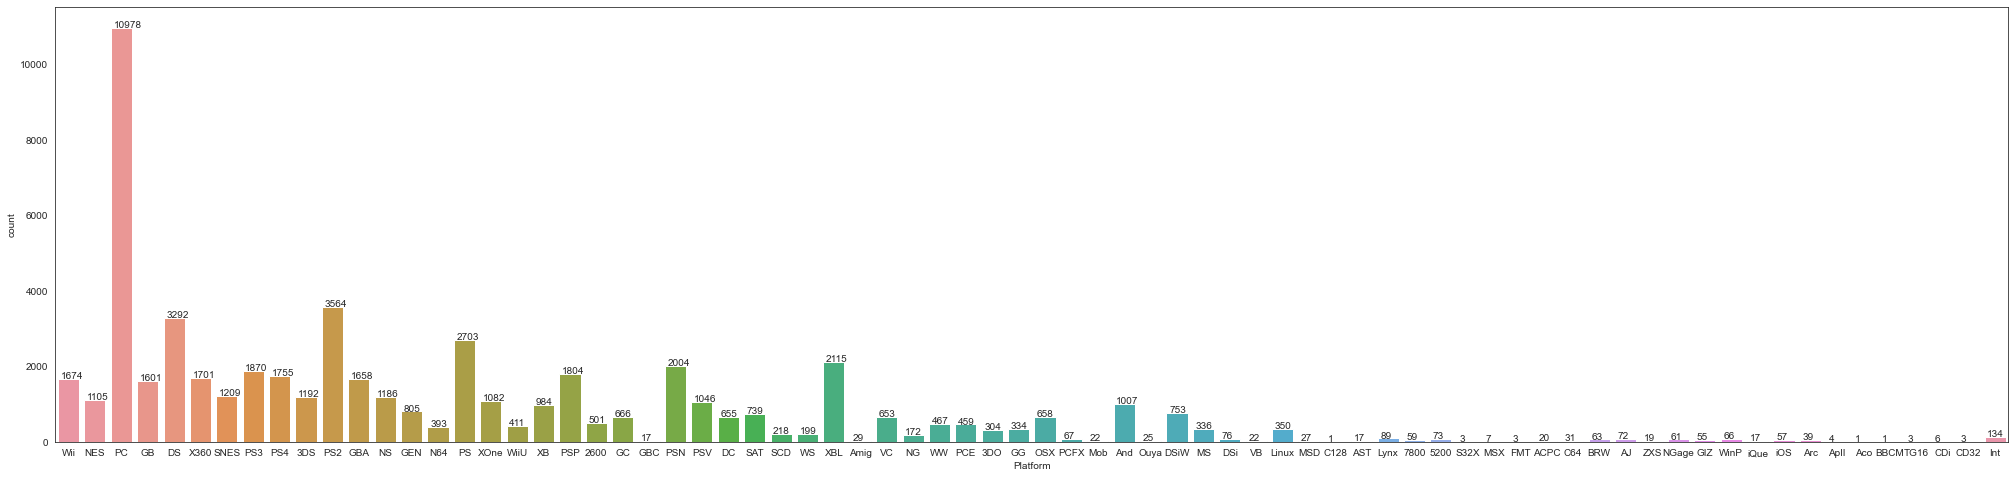

In [123]:
#displaying game counts on each platform
plt.figure(figsize=(35, 8))
vls=sns.countplot(x="Platform", data = df2_copy) 
for i in vls.patches: ## this for prints numbers on bars
        vls.annotate('{}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+5))

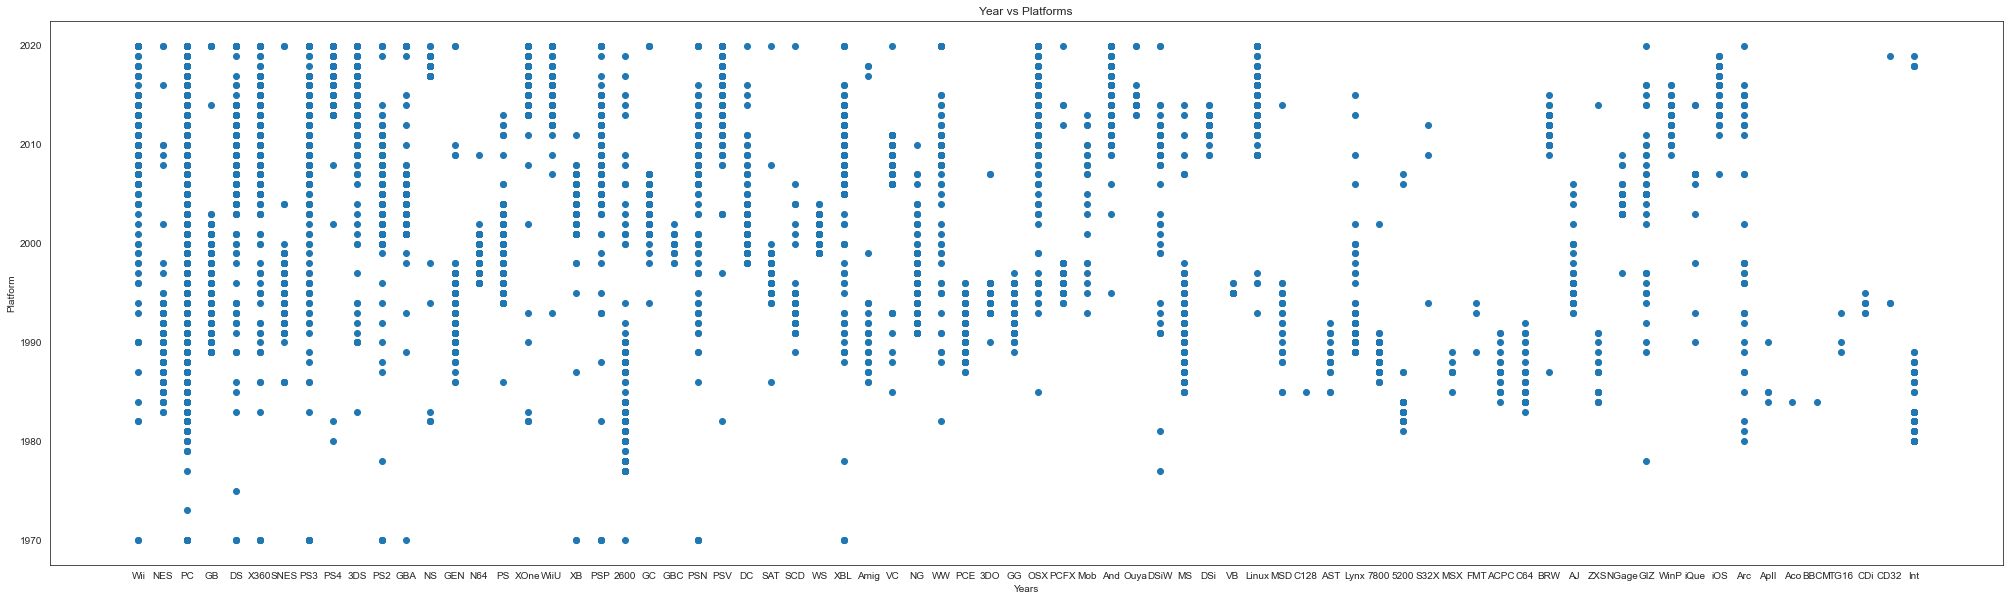

In [124]:
X=df2_copy['Platform']
Y=df2_copy['Year']

plt.figure(figsize=(35, 10))
plt.title("Year vs Platforms")
plt.xlabel("Years")
plt.ylabel("Platform")
plt.scatter(X, Y) # as we can see, some platforms don't prefering now. Let's remove before 2015



In [125]:
df2_copy=df2_copy[df2_copy['Year']>=2015] # Years start from 2015 now.

In [126]:
years = df2_copy['Year'].unique()
print(years) # There are only last 5 years games anymore.

[2017. 2016. 2015. 2018. 2020. 2019.]


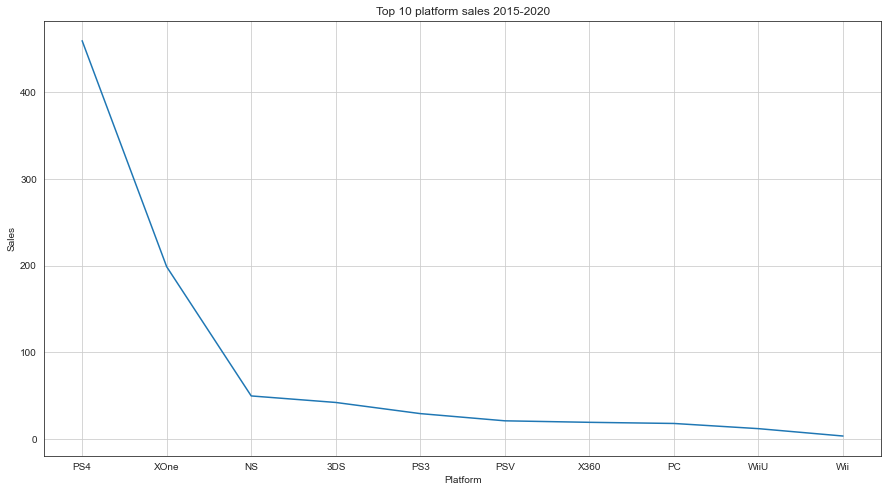

In [127]:
#Firstly, sums up sales in each platform. Secondly sorts them in descending order
df2_copy["Platform_Sales"] = df2_copy.groupby(["Platform"])["Global_Sales"].transform(sum)
platform_df = df2_copy[['Platform', 'Platform_Sales']].drop_duplicates().sort_values(by=['Platform_Sales'], ascending=False)

# Visualization
top_platforms = platform_df.head(10)['Platform'].tolist()
plt.figure(figsize=(15,8))
plt.title("Top 10 platform sales 2015-2020")
plt.ylabel("Sales")
plt.xlabel("Platform")
plt.grid()
plt.plot(platform_df.head(10)['Platform'], platform_df.head(10)['Platform_Sales'])
#we can see the most prefered 10 platforms. Publishers can 

#Game genre 

In [128]:
df_c = df2[['Name','Genre']].copy()
df_c.head()

,Name,Genre
0,Wii Sports,Sports
1,Super Mario Bros.,Platform
2,Mario Kart Wii,Racing
3,PlayerUnknown's Battlegrounds,Shooter
4,Wii Sports Resort,Sports


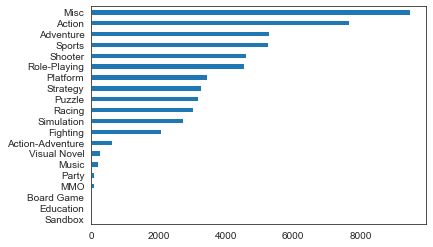

In [129]:
df_c.Genre.value_counts(ascending=True).plot(kind='barh')
plt.show()

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))

# split dataset into training and validation set
y = df_c.Genre
x = df_c.Name
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size = 0.2)

# create the TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn import metrics

mnb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)

# fit model on train data
mnb.fit(xtrain_tfidf, ytrain)
lr.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
mnb_pred = mnb.predict(xval_tfidf)
lr_pred = lr.predict(xval_tfidf)

# evaluate performance
mnb_acc = metrics.accuracy_score(yval, mnb_pred)
mnb_acc = round(mnb_acc,2)
lr_acc = metrics.accuracy_score(yval, lr_pred)
lr_acc = round(lr_acc,2)

In [131]:
pred_df = pd.DataFrame(xval)
pred_df['actual'] = yval
pred_df['prediction'] = lr_pred
pred_df.sample(10)

,Name,actual,prediction
24865,Bloody Wolf,Shooter,Shooter
35334,Killzone 2: Napalm & Cordite Pack,Shooter,Shooter
3583,Crash Bandicoot N. Sane Trilogy,Platform,Platform
12824,NASCAR: Dirt to Daytona,Racing,Racing
30782,Fight Night Round 3,Fighting,Fighting
37313,Max Fun Times,Misc,Action
26111,Centipede & Battlezone,Misc,Shooter
23769,Bakuretsu Hunter R,Adventure,Action
34662,Jewel Adventures,Misc,Puzzle
28980,DoveZ: The Second Wave,Shooter,Adventure


With over 70% accuracy, the above sample shows the model was able to correctly classify most of the video game titles except there are cases of mis-classification for games in similar genres where the word use will likely be similar. Such as Strategy, Action and Adventure to name a few.

# On which platforms are the games played the most?

In [132]:
path = os.getcwd()
path =  os.path.join(path , 'Video_Games_Sales_as_at_22_Dec_2016.csv');
df_1 = pd.read_csv(path)
df_1.shape

(16719, 16)

In [133]:
path = os.getcwd()
path

'C:\\Users\\ciyab\\Desktop\\Python'

In [134]:
df_1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
path = os.path.join('vgsales-12-4-2019.csv' );
df_2 = pd.read_csv(path)
df_2.shape

(55792, 23)

In [136]:
df_2.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [137]:
df_1 = df_1[["Name" , "Platform" , "Year_of_Release" , "Global_Sales" ]].copy()

In [138]:
df_1 = df_1.rename(columns = {"Year_of_Release" : "Year"})

In [139]:
df_1.head()

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,82.53
1,Super Mario Bros.,NES,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,31.37


In [140]:
df_2 = df_2[["Name" , "Platform" , "Year","Global_Sales"]].copy()
df_2.head(10)

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,NaN
1,Super Mario Bros.,NES,1985.0,NaN
2,Mario Kart Wii,Wii,2008.0,NaN
3,PlayerUnknown's Battlegrounds,PC,2017.0,NaN
4,Wii Sports Resort,Wii,2009.0,NaN
5,Pokemon Red / Green / Blue Version,GB,1998.0,NaN
6,New Super Mario Bros.,DS,2006.0,NaN
7,Tetris,GB,1989.0,NaN
8,New Super Mario Bros. Wii,Wii,2009.0,NaN
9,Minecraft,PC,2010.0,NaN


In [141]:
df  = pd.concat([df_1,df_2]).drop_duplicates().reset_index(drop=True)

In [142]:
df = df.fillna(df.mean())

In [143]:
df.head()

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,82.53
1,Super Mario Bros.,NES,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,31.37


In [144]:
df.shape

(61670, 4)

In [145]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX', 'NS', 'GBC', 'PSN', 'XBL', 'Amig', 'VC', 'WW',
       'PCE', 'OSX', 'Mob', 'And', 'Ouya', 'DSiW', 'MS', 'DSi', 'VB',
       'Linux', 'MSD', 'C128', 'AST', 'Lynx', '7800', '5200', 'S32X',
       'MSX', 'FMT', 'ACPC', 'C64', 'BRW', 'AJ', 'ZXS', 'NGage', 'GIZ',
       'WinP', 'iQue', 'iOS', 'Arc', 'ApII', 'Aco', 'BBCM', 'CDi', 'CD32',
       'Int'], dtype=object)

In [146]:
df = df.groupby("Platform")["Global_Sales"].sum()
df.head()

Platform
2600    360.775781
3DO     148.417952
3DS     651.825904
5200     36.063935
7800     29.147564
Name: Global_Sales, dtype: float64

In [147]:
df = pd.DataFrame(df)
df.reset_index(level=0, inplace=True)

In [148]:
df.columns = ['Platform' , 'Number']

In [149]:
df = df.sort_values('Number' , ascending=False)[0:10].copy()

In [150]:
df.head(10)

,Platform,Number
45,PC,4979.084831
49,PS2,2095.764235
50,PS3,1866.258962
67,X360,1697.058126
48,PS,1651.616264
20,DS,1414.576822
51,PS4,1303.189789
64,Wii,1289.739634
69,XBL,1039.651770
24,GB,1029.113033


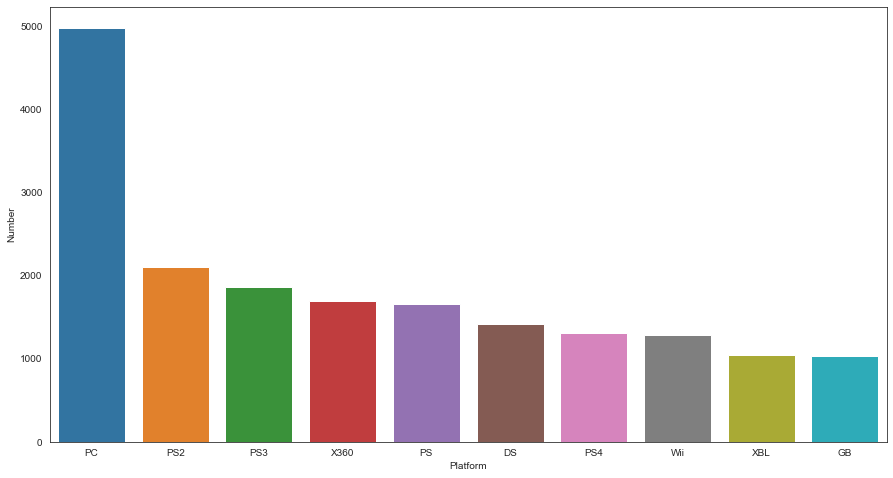

In [151]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Platform", y="Number", data=df)

# What are the most played games over time?

In [152]:
path =  os.path.join('Video_Games_Sales_as_at_22_Dec_2016.csv');
df_1 = pd.read_csv(path)
df.shape

(10, 2)

In [153]:
df_1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
path = os.path.join('vgsales-12-4-2019.csv' );
df_2 = pd.read_csv(path)
df_2.shape

(55792, 23)

In [155]:
df_2.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [156]:
df_1 = df_1[["Name" , "Platform" , "Year_of_Release" , "Global_Sales" ]].copy()

In [157]:
df_1 = df_1.rename(columns = {"Year_of_Release" : "Year"})

In [158]:
df_1.head()

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,82.53
1,Super Mario Bros.,NES,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,31.37


In [159]:
df_2 = df_2[["Name" , "Platform" , "Year","Global_Sales"]].copy()
df_2.head(10)

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,NaN
1,Super Mario Bros.,NES,1985.0,NaN
2,Mario Kart Wii,Wii,2008.0,NaN
3,PlayerUnknown's Battlegrounds,PC,2017.0,NaN
4,Wii Sports Resort,Wii,2009.0,NaN
5,Pokemon Red / Green / Blue Version,GB,1998.0,NaN
6,New Super Mario Bros.,DS,2006.0,NaN
7,Tetris,GB,1989.0,NaN
8,New Super Mario Bros. Wii,Wii,2009.0,NaN
9,Minecraft,PC,2010.0,NaN


In [160]:
df  = pd.concat([df_1,df_2]).drop_duplicates().reset_index(drop=True)

In [161]:
df = df.fillna(df.mean())

In [162]:
df.head()

,Name,Platform,Year,Global_Sales
0,Wii Sports,Wii,2006.0,82.53
1,Super Mario Bros.,NES,1985.0,40.24
2,Mario Kart Wii,Wii,2008.0,35.52
3,Wii Sports Resort,Wii,2009.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,31.37


In [163]:
df.shape

(61670, 4)

In [164]:
df["Name"].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'In the Valley of Gods', 'Lost Ember', 'Falcon Age'], dtype=object)

In [165]:
df = df.groupby("Name")["Global_Sales"].sum()
df.head()

Name
 Beyblade Burst                0.03
 Fire Emblem Fates             1.68
 Frozen: Olaf's Quest          1.12
 Haikyu!! Cross Team Match!    0.04
 Tales of Xillia 2             0.84
Name: Global_Sales, dtype: float64

In [166]:
df = pd.DataFrame(df)
df.reset_index(level=0, inplace=True)

In [167]:
df.columns = ['Name' , 'Number']

In [168]:
df = df.sort_values('Number' , ascending=False)[0:10].copy()

In [169]:
df.head(10)

,Name,Number
12886,Grand Theft Auto V,121.354027
35913,Wii Sports,83.024027
4925,Call of Duty: Black Ops,61.428053
4937,Call of Duty: Modern Warfare 3,61.300000
4931,Call of Duty: Black Ops II,58.990000
4934,Call of Duty: Ghosts,56.200000
4930,Call of Duty: Black Ops 3,52.400000
19791,Minecraft,50.146106
4936,Call of Duty: Modern Warfare 2,50.078053
30602,Super Mario Bros.,47.286106


[Text(0, 0, 'Grand Theft Auto V'),
 Text(1, 0, 'Wii Sports'),
 Text(2, 0, 'Call of Duty: Black Ops'),
 Text(3, 0, 'Call of Duty: Modern Warfare 3'),
 Text(4, 0, 'Call of Duty: Black Ops II'),
 Text(5, 0, 'Call of Duty: Ghosts'),
 Text(6, 0, 'Call of Duty: Black Ops 3'),
 Text(7, 0, 'Minecraft'),
 Text(8, 0, 'Call of Duty: Modern Warfare 2'),
 Text(9, 0, 'Super Mario Bros.')]

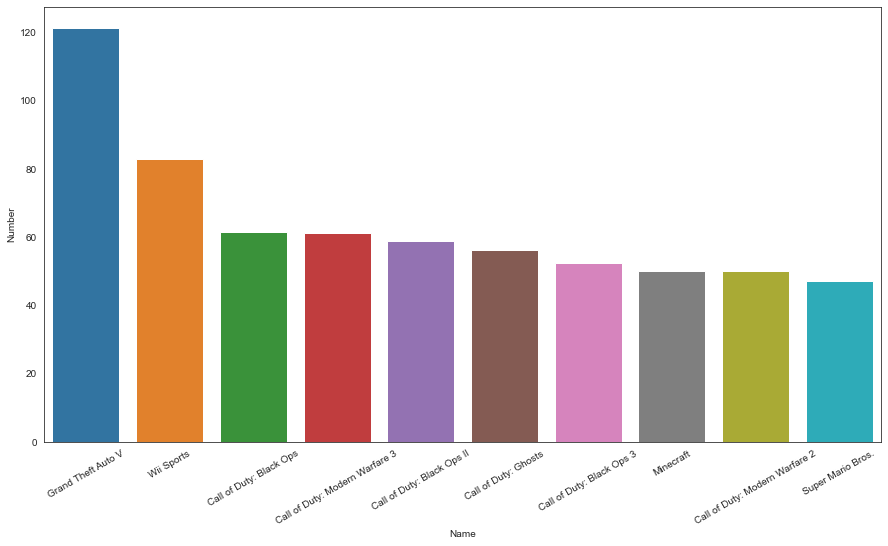

In [170]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Name", y="Number", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)